# 그래픽카드 데이터 분석을 해보자.
- 전시간에 저장했던 엑셀을 불러오자

In [31]:
import pandas as pd
GPU_info = pd.read_excel("RTX3050.xlsx").fillna("")

In [32]:
GPU_info.reset_index()

,index,Unnamed: 0,제목,가격,제조사,브랜드,링크,판매자
0,0,0,MSI 지포스 RTX 3050 게이밍 X D6 8GB 트윈프로져8,409000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,1,1,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,379000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,2,2,이엠텍 지포스 RTX 3050 STORM X Dual OC D6 8GB,404550,이엠텍,이엠텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,3,3,리드텍 WinFast 지포스 RTX 3050 HURRICANE WHITE D6 8GB,348950,리드텍,리드텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,4,4,조텍 GAMING 지포스 RTX 3050 TWIN Edge OC D6 8GB,384200,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...,...,...,...
995,995,95,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,448320,,MSI,https://search.shopping.naver.com/gate.nhn?id=...,11번가
996,996,96,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,419030,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,쿠팡
997,997,97,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,436320,,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,11번가
998,998,98,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,448320,MSI,,https://search.shopping.naver.com/gate.nhn?id=...,11번가


In [33]:
del GPU_info["Unnamed: 0"]
GPU_info

,제목,가격,제조사,브랜드,링크,판매자
0,MSI 지포스 RTX 3050 게이밍 X D6 8GB 트윈프로져8,409000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,379000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,이엠텍 지포스 RTX 3050 STORM X Dual OC D6 8GB,404550,이엠텍,이엠텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
3,리드텍 WinFast 지포스 RTX 3050 HURRICANE WHITE D6 8GB,348950,리드텍,리드텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,조텍 GAMING 지포스 RTX 3050 TWIN Edge OC D6 8GB,384200,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...,...
995,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,448320,,MSI,https://search.shopping.naver.com/gate.nhn?id=...,11번가
996,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,419030,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,쿠팡
997,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,436320,,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,11번가
998,MSI 지포스 RTX 3050 벤투스 2X OC D6 8GB,448320,MSI,,https://search.shopping.naver.com/gate.nhn?id=...,11번가


## 목표 설정
- 제조사별로 그래픽카드를 조회하고 싶다.
- 하급모델, 중급모델, 상급모델만 조회하고 싶다.
- 중고 모델은 필요없다.

In [34]:
GPU_info["브랜드"].value_counts()

             594
리드텍          100
GALAX         62
게인워드          43
PALIT         41
컬러풀           36
PNY           30
ASUS          28
기가바이트         25
MSI           10
이엠텍            5
조텍             5
UNKNOWN        5
갤라즈            4
어로스            3
갤럭시            3
PHOENIX        2
INNO3D         1
갤럭시라이프스타일      1
만리             1
포사             1
Name: 브랜드, dtype: int64

In [35]:
maker_GPU = ["리드텍", "갤럭시", "PALIT", "EVGA",  "PNY" ,
             "게인워드", "ASUS", "기가바이트", "MSI", 
             "이엠텍", "조텍", "만리", "INNO3D"]

In [36]:
GPU_maker = []
for each in maker_GPU:
    GPU_maker.append(GPU_info[GPU_info['제목'].str.contains(each)].fillna(""))
GPU_maker[1]

,제목,가격,제조사,브랜드,링크,판매자
10,갤럭시 GALAX 지포스 RTX 3050 D6 8GB,384000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
35,갤럭시 갤럭시 갤라즈 지포스 RTX 3050 V2 D6 8GB,400000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,하이마트쇼핑몰
47,갤럭시 RTX 3050 EX BLACK D6 8GB 그래픽카드,431000,,,https://search.shopping.naver.com/gate.nhn?id=...,ICODA
56,갤럭시 갤라즈 BOY 지포스 RTX 3050 D6 8GB,391110,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
58,갤럭시 갤라즈 BOY 지포스 RTX3050 D6 6GB,381300,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가
...,...,...,...,...,...,...
927,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,480000,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가
938,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,400000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,아이티엔조이
996,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,419030,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,쿠팡
997,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,436320,,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,11번가


- for문 을 사용하는 것도 좋다. 그러나 활용성에 영향을 주기 때문에 다른 방법으로 접근한다.

In [37]:
leadtec = GPU_info[GPU_info['제목'].str.contains("리드텍")]

In [38]:
leadtek = GPU_info[GPU_info['제목'].str.contains("리드텍|leadtek")]
galaxy = GPU_info[GPU_info['제목'].str.contains("갤럭시|galaxy")]
palit = GPU_info[GPU_info['제목'].str.contains("PALIT")]
EVGA = GPU_info[GPU_info['제목'].str.contains("EVGA")]
PNY = GPU_info[GPU_info['제목'].str.contains("PNY")]
Gainward  = GPU_info[GPU_info['제목'].str.contains("게인워드|Gainward")]
ASUS = GPU_info[GPU_info['제목'].str.contains("ASUS|에이수스")]
Gigabyte  = GPU_info[GPU_info['제목'].str.contains("기가바이트|Gigabyte|AORUS")]
MSI= GPU_info[GPU_info['제목'].str.contains("MSI")]
emtek  = GPU_info[GPU_info['제목'].str.contains("이엠텍")]
ZOTAC  = GPU_info[GPU_info['제목'].str.contains("조텍|ZOTAC")]
Manli = GPU_info[GPU_info['제목'].str.contains("만리|Manli")]
INNO3D = GPU_info[GPU_info['제목'].str.contains("INNO3D|이노3D")]

In [39]:
ZOTAC

,제목,가격,제조사,브랜드,링크,판매자
4,조텍 GAMING 지포스 RTX 3050 TWIN Edge OC D6 8GB,384200,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
375,ZOTAC 조텍 RTX 3050 TwinEdgeOC ZT-A30500H-10M,801000,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
688,ZOTAC GAMING GeForce RTX 3050 Graphics Card - ...,624000,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,보부상닷컴
808,ZOTAC 조텍 RTX 3050 TwinEdgeOC ZT-A30500H-10M,863300,,조텍,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
994,ZOTAC 지포스 RTX 3050 TWIN Edge OC D6 8GB,594150,,UNKNOWN,https://search.shopping.naver.com/gate.nhn?id=...,11번가


In [40]:
galaxy 

,제목,가격,제조사,브랜드,링크,판매자
10,갤럭시 GALAX 지포스 RTX 3050 D6 8GB,384000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
35,갤럭시 갤럭시 갤라즈 지포스 RTX 3050 V2 D6 8GB,400000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,하이마트쇼핑몰
47,갤럭시 RTX 3050 EX BLACK D6 8GB 그래픽카드,431000,,,https://search.shopping.naver.com/gate.nhn?id=...,ICODA
56,갤럭시 갤라즈 BOY 지포스 RTX 3050 D6 8GB,391110,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
58,갤럭시 갤라즈 BOY 지포스 RTX3050 D6 6GB,381300,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가
...,...,...,...,...,...,...
927,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,480000,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가
938,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,400000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,아이티엔조이
996,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,419030,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,쿠팡
997,갤럭시 갤라즈 GALAX 지포스 RTX 3050 V2 D6 8GB,436320,,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,11번가


- EVGA의 그래픽카드를 저렴한순으로 보여주세요.

In [43]:
EVGA.sort_values(by="가격", ascending=True)

,제목,가격,제조사,브랜드,링크,판매자
838,이엠텍 EVGA 지포스 RTX 3050 XC GAMING D6 8GB LHR,376650,EVGA,이엠텍,https://search.shopping.naver.com/gate.nhn?id=...,하이마트쇼핑몰
743,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,385860,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
821,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,385870,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
802,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,385870,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
790,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,385870,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
...,...,...,...,...,...,...
587,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,522000,EVGA,,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
484,[EVGA 지포스 RTX 3050 XC GAMING D6 8GB],522000,EVGA,,https://search.shopping.naver.com/gate.nhn?id=...,SSG닷컴
844,[EVGA] GeForce RTX 3050 XC GAMING D6 8GB,593610,,,https://search.shopping.naver.com/gate.nhn?id=...,에이치비플랜
361,EVGA 지포스 RTX 3050 XC GAMING D6 8GB,605370,EVGA,,https://search.shopping.naver.com/gate.nhn?id=...,11번가


In [44]:
Gigabyte

,제목,가격,제조사,브랜드,링크,판매자
5,기가바이트 어로스 지포스 RTX 3050 ELITE D6 8GB 제이씨현,415480,기가바이트,어로스,https://search.shopping.naver.com/gate.nhn?id=...,네이버
6,기가바이트 지포스 RTX 3050 EAGLE OC D6 8GB 제이씨현,399000,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
8,기가바이트 지포스 RTX 3050 Gaming OC D6 8GB 피씨디렉트,398000,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
11,기가바이트 지포스 RTX 3050 Gaming OC D6 8GB 제이씨현,398200,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
27,GIGABYTE AORUS 지포스 RTX 3050 ELITE D6 8GB 제이씨현 ...,399000,기가바이트,어로스,https://search.shopping.naver.com/gate.nhn?id=...,comgee
37,GIGABYTE AORUS 지포스 RTX 3050 ELITE D6 8GB 제이씨,521310,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,11번가
60,기가바이트 지포스 RTX 3050 EAGLE OC D6 8GB 피씨디렉트,404550,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
327,GIGABYTE AORUS 지포스 RTX 3050 ELITE D6 8GB,432900,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
343,기가바이트 RTX 3050 EAGLE OC D6 8GB 제이씨현,359000,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,지니어스피씨
438,GIGABYTE AORUS RTX 3050 ELITE D6 8GB 제이씨,609000,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓


In [48]:
import pandas as pd
GPU_info70 = pd.read_excel("RTX3070ti.xlsx").fillna("")
GPU_info70.reset_index()
del GPU_info70["Unnamed: 0"]
GPU_info70

,제목,가격,제조사,브랜드,링크,판매자
0,MSI 지포스 RTX 3070 Ti 게이밍 X 트리오 D6X 8GB,869000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S,899000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
2,갤럭시코리아 GALAX 지포스 RTX 3070 Ti EX WHITE OC D6X 8...,550000,갤럭시,엔비디아,https://search.shopping.naver.com/gate.nhn?id=...,마왕툴스
3,엔비디아 리더스 시스템 RTX3070TI FE 파운더리 에디션 그래픽카드 리퍼비쉬,710000,리더스시스템,엔비디아,https://search.shopping.naver.com/gate.nhn?id=...,마왕툴스
4,기가바이트 지포스 RTX 3070 Ti Gaming OC D6X 8GB 제이씨현,855800,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...,...
995,PNY 지포스 RTX3070Ti UPRISING EPICX RGB D6X 8G Tri,806870,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
996,PNY 지포스 RTX3070Ti UPRISING EPICX RGB D6X 8G Tri,810970,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
997,리드텍 WinFast 지포스 RTX 3070 Ti HURRICANE D6X 8GB,861790,,,https://search.shopping.naver.com/gate.nhn?id=...,조이젠 스토어
998,RTX3070ti 게이밍 그래픽카드 데스크탑 8GB 10GB 12GB,1209550,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가


In [55]:
GPU_info70["브랜드"].value_counts()

           562
GALAX       85
컬러풀         79
기가바이트       64
PALIT       61
ASUS        48
리드텍         29
PNY         15
MSI         13
이엠텍         10
조텍           6
INNO3D       6
엔비디아         5
게인워드         5
만리           3
갤럭시          3
UNKNOWN      2
TUF          1
어로스          1
수작PC         1
메모렛          1
Name: 브랜드, dtype: int64

In [52]:
leadtek = GPU_info70[GPU_info70['제목'].str.contains("리드텍|leadtek")]
galaxy = GPU_info70[GPU_info70['제목'].str.contains("갤럭시|galaxy")]
palit = GPU_info70[GPU_info70['제목'].str.contains("PALIT")]
EVGA = GPU_info70[GPU_info70['제목'].str.contains("EVGA")]
PNY = GPU_info70[GPU_info70['제목'].str.contains("PNY")]
Gainward  = GPU_info70[GPU_info70['제목'].str.contains("게인워드|Gainward")]
ASUS = GPU_info70[GPU_info70['제목'].str.contains("ASUS|에이수스")]
Gigabyte  = GPU_info70[GPU_info70['제목'].str.contains("기가바이트|Gigabyte|AORUS")]
MSI= GPU_info70[GPU_info70['제목'].str.contains("MSI")]
emtek  = GPU_info70[GPU_info70['제목'].str.contains("이엠텍")]
ZOTAC  = GPU_info70[GPU_info70['제목'].str.contains("조텍|ZOTAC")]
Manli = GPU_info70[GPU_info70['제목'].str.contains("만리|Manli")]
INNO3D = GPU_info70[GPU_info70['제목'].str.contains("INNO3D|이노3D")]

In [54]:
galaxy.sort_values(by="가격", ascending=True)

,제목,가격,제조사,브랜드,링크,판매자
29,중고 갤럭시 GALAX RTX 3070 Ti EX GAMER BLACK OC D6X...,507000,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
2,갤럭시코리아 GALAX 지포스 RTX 3070 Ti EX WHITE OC D6X 8...,550000,갤럭시,엔비디아,https://search.shopping.naver.com/gate.nhn?id=...,마왕툴스
103,갤럭시 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,850050,삼성전자,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
271,갤럭시 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,850060,삼성전자,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,옥션
484,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,864010,,,https://search.shopping.naver.com/gate.nhn?id=...,롯데ON
...,...,...,...,...,...,...
952,갤럭시 지포스 RTX 3070Ti EX GAMER WHITE OC D6X 8GB,2256000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
430,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,2500000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,생명컴퓨터
54,갤럭시 GALAX 지포스 RTX 3070 Ti EX GAMER WHITE OC D6...,2510000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
110,갤럭시 RTX 3070 Ti EX GAMER WHITE OC D6X 8GB,3040000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크


In [56]:
GPU_info70_nosecond =GPU_info70[~GPU_info70['제목'].str.contains("중고|리퍼", na=False, case=False)]
GPU_info70_nosecond

,제목,가격,제조사,브랜드,링크,판매자
0,MSI 지포스 RTX 3070 Ti 게이밍 X 트리오 D6X 8GB,869000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
1,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S,899000,MSI,MSI,https://search.shopping.naver.com/gate.nhn?id=...,네이버
4,기가바이트 지포스 RTX 3070 Ti Gaming OC D6X 8GB 제이씨현,855800,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,네이버
5,이엠텍 지포스 RTX 3070 Ti BLACK EDITION D6X 8GB,950430,이엠텍,이엠텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
6,ASUS TUF Gaming 지포스 RTX 3070 Ti O8G V2 OC D6X ...,869000,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...,...
995,PNY 지포스 RTX3070Ti UPRISING EPICX RGB D6X 8G Tri,806870,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
996,PNY 지포스 RTX3070Ti UPRISING EPICX RGB D6X 8G Tri,810970,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
997,리드텍 WinFast 지포스 RTX 3070 Ti HURRICANE D6X 8GB,861790,,,https://search.shopping.naver.com/gate.nhn?id=...,조이젠 스토어
998,RTX3070ti 게이밍 그래픽카드 데스크탑 8GB 10GB 12GB,1209550,,,https://search.shopping.naver.com/gate.nhn?id=...,11번가


In [59]:
leadtek = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("리드텍|leadtek")]
galaxy = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("갤럭시|galaxy")]
palit = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("PALIT")]
EVGA = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("EVGA")]
PNY = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("PNY")]
Gainward  = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("게인워드|Gainward")]
ASUS = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("ASUS|에이수스")]
Gigabyte  = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("기가바이트|Gigabyte|AORUS")]
MSI= GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("MSI")]
emtek  = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("이엠텍")]
ZOTAC  = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("조텍|ZOTAC")]
Manli = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("만리|Manli")]
INNO3D = GPU_info70_nosecond[GPU_info70_nosecond['제목'].str.contains("INNO3D|이노3D")]

In [60]:
galaxy.sort_values(by="가격", ascending=True)

,제목,가격,제조사,브랜드,링크,판매자
103,갤럭시 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,850050,삼성전자,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
271,갤럭시 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,850060,삼성전자,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,옥션
484,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,864010,,,https://search.shopping.naver.com/gate.nhn?id=...,롯데ON
461,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,882360,,,https://search.shopping.naver.com/gate.nhn?id=...,페이코리아
460,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,882400,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,YJMODx영재컴퓨터
...,...,...,...,...,...,...
952,갤럭시 지포스 RTX 3070Ti EX GAMER WHITE OC D6X 8GB,2256000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
430,갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,2500000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,생명컴퓨터
54,갤럭시 GALAX 지포스 RTX 3070 Ti EX GAMER WHITE OC D6...,2510000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
110,갤럭시 RTX 3070 Ti EX GAMER WHITE OC D6X 8GB,3040000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크


# 1티어 그래픽카드를 찾아보자

In [64]:
GPU_info70_tier1= GPU_info70_nosecond[GPU_info70_nosecond['제목'].\
                                    str.contains("STRIX|스트릭스| \
                                                 슈프림|suprim| \
                                                 어로스|AORUS| \
                                                 호프|HOF|AMP|\
                                                 불칸|VULCAN|\
                                                 블랙몬스터|blackmonster|\
                                                 GameRock")]

In [79]:
GPU_info70_tier1

,제목,가격,제조사,브랜드,링크,판매자
14,ASUS ROG STRIX 지포스 RTX 3070 Ti O8G GAMING OC D...,1068000,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,네이버
15,조텍 GAMING 지포스 RTX 3070 Ti AMP Holo Black D6X 8GB,830000,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
49,ASUS ROG STRIX 지포스 RTX 3070 Ti O8G GAMING OC D...,970000,,,https://search.shopping.naver.com/gate.nhn?id=...,NO.1 컴퓨터
66,ASUS-새로운 그래픽 카드 듀얼 TUF ATS ROG STRIX RTX 3070...,1280662,,,https://search.shopping.naver.com/gate.nhn?id=...,aliexpress
84,GIGABYTE AORUS RTX 3070 Ti Master 8GB 제이씨현,1533700,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,와이씨샵
90,조텍 지포스 RTX 3070 AMP Holo Black D6 8GB,3500000,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
94,GIGABYTE AORUS RTX 3070 Ti Master D6X 8GB YS,1017380,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
101,[ASUS] 지포스 RTX 3070 TI ROG STRIX GAMING 8GB,1021000,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,Core Korea
137,GIGABYTE AORUS RTX 3070 Ti Master 8GB 제이씨현,1441680,,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
200,조텍 Gaming GeForce RTX 3070 Ti AMP Holo 8GB,2160000,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션


In [66]:
GPU_info70_tier1.sort_values(by="가격", ascending=True)

,제목,가격,제조사,브랜드,링크,판매자
15,조텍 GAMING 지포스 RTX 3070 Ti AMP Holo Black D6X 8GB,830000,조텍,조텍,https://search.shopping.naver.com/gate.nhn?id=...,네이버
49,ASUS ROG STRIX 지포스 RTX 3070 Ti O8G GAMING OC D...,970000,,,https://search.shopping.naver.com/gate.nhn?id=...,NO.1 컴퓨터
94,GIGABYTE AORUS RTX 3070 Ti Master D6X 8GB YS,1017380,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
101,[ASUS] 지포스 RTX 3070 TI ROG STRIX GAMING 8GB,1021000,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,Core Korea
399,ASUS ROG STRIX 지포스 RTX 3070 Ti O8G GAMING OC D...,1051050,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
14,ASUS ROG STRIX 지포스 RTX 3070 Ti O8G GAMING OC D...,1068000,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,네이버
725,GIGABYTE AORUS 지포스 RTX 3070 Ti Master D6X 8GB,1130400,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
724,GIGABYTE AORUS 지포스 RTX 3070 Ti Master D6X 8GB,1130400,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
708,GIGABYTE AORUS 지포스 RTX 3070 Ti Master D6X 8GB,1205760,기가바이트,기가바이트,https://search.shopping.naver.com/gate.nhn?id=...,11번가
66,ASUS-새로운 그래픽 카드 듀얼 TUF ATS ROG STRIX RTX 3070...,1280662,,,https://search.shopping.naver.com/gate.nhn?id=...,aliexpress


# 2티어 그래픽카드를 찾아보자

In [67]:
GPU_info70_tier2= GPU_info70_nosecond[GPU_info70_nosecond['제목'].\
                                    str.contains("TUF|KO| \
                                                 트리오|trio| \
                                                 gaming OC| \
                                                 vision OC|EX|\
                                                 XC3|\
                                                 black Edition|\
                                                 gaming pro")]

In [76]:
GPU_info70_tier2.sort_values(by="가격", ascending=True)

,제목,가격,제조사,브랜드,링크,판매자
55,ASUS TUF Gaming GeForce RTX 3070 Ti OC Edition...,15920,,,https://search.shopping.naver.com/gate.nhn?id=...,유닛808
34,gtx ASUS TUF RTX3070TI 8G OC 게임 그래픽 카드,218460,,,https://search.shopping.naver.com/gate.nhn?id=...,롯데ON
60,ASUS TUF Gaming 지포스 RTX 3070 Ti D6X 8GB,828880,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,11번가
968,ASUS TUF Gaming 지포스 RTX 3070 Ti O8G OC D6X 8G,838800,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
112,에이수스 ASUS TUF Gaming 지포스 RTX 3070 Ti O8G OC D6...,838800,ASUS,ASUS,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
...,...,...,...,...,...,...
414,아수스 엔비디아 그래픽카드 TUF RTX3070TI O8G,1675000,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
952,갤럭시 지포스 RTX 3070Ti EX GAMER WHITE OC D6X 8GB,2256000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
54,갤럭시 GALAX 지포스 RTX 3070 Ti EX GAMER WHITE OC D6...,2510000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
110,갤럭시 RTX 3070 Ti EX GAMER WHITE OC D6X 8GB,3040000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크


# 3티어 그래픽카드를 찾아보자

In [84]:
engine='python'
GPU_info70_tier3= GPU_info70_nosecond[GPU_info70_nosecond['제목'].\
                                    str.contains("DUAL|듀얼|\
                                                 벤투스|ventus|\
                                                 이글|eagle|\
                                                 UDV|BOY|\
                                                 SG|Twin edge|\
                                                 트윈|GT|\
                                                 토마호크|tomahawk|\
                                                 STORM|스톰")]

In [86]:
GPU_info70_tier3

,제목,가격,제조사,브랜드,링크,판매자
66,ASUS-새로운 그래픽 카드 듀얼 TUF ATS ROG STRIX RTX 3070...,1280662,,,https://search.shopping.naver.com/gate.nhn?id=...,aliexpress


In [91]:
GPU_info70_nosecond.sort_values(by="가격", ascending=True).head(10)

,제목,가격,제조사,브랜드,링크,판매자
556,GA92S2U 4PIN GPU RTX3080 RTX3090 ZOTAC GeForce...,13998,,,https://search.shopping.naver.com/gate.nhn?id=...,aliexpress
55,ASUS TUF Gaming GeForce RTX 3070 Ti OC Edition...,15920,,,https://search.shopping.naver.com/gate.nhn?id=...,유닛808
978,"Bykski 풀 커버 RGB GPU 블록, ZOTAC RTX3070TI 8GD6",199600,,,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
34,gtx ASUS TUF RTX3070TI 8G OC 게임 그래픽 카드,218460,,,https://search.shopping.naver.com/gate.nhn?id=...,롯데ON
916,그림자 RTX3070TI/RTX3080TIRTX3060TIRTX3090 메탈 마,585500,,,https://search.shopping.naver.com/gate.nhn?id=...,인터파크
126,신품)GIGABYTE RTX3070Ti Gaming OC D6X 8GB 제이씨현,737100,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
561,Colorful iGAME 지포스 RTX 3070 Ti 토마호크 D6X 8GB,772760,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
52,이도디스플레이 RAGA-X 지포스 3070 Ti D6X 8GB TRIPLE,788000,이도디스플레이,,https://search.shopping.naver.com/gate.nhn?id=...,네이버
80,PNY 지포스 RTX3070Ti UPRISING EPICX RGB D6X 8G Tri,788690,PNY,PNY,https://search.shopping.naver.com/gate.nhn?id=...,11번가
301,COLORFUL 지포스 RTX 3070 Ti 토마호크 D6X 8GB,791900,,,https://search.shopping.naver.com/gate.nhn?id=...,컴디씨


In [89]:
GPU_info70_nosecond["브랜드"].value_counts()

           552
GALAX       85
컬러풀         79
기가바이트       64
PALIT       61
ASUS        46
리드텍         29
PNY         15
MSI         13
이엠텍         10
조텍           6
INNO3D       6
게인워드         5
만리           3
엔비디아         3
갤럭시          3
UNKNOWN      2
TUF          1
어로스          1
수작PC         1
메모렛          1
Name: 브랜드, dtype: int64

In [90]:
galaxy

,제목,가격,제조사,브랜드,링크,판매자
10,갤럭시코리아 GALAX 지포스 RTX 3070 Ti EX WHITE OC D6X 8...,905000,갤럭시코리아,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
22,갤럭시코리아 GALAX 지포스 RTX3070 Ti EX BLACK OC D6X 8G,913000,갤럭시코리아,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
27,갤럭시코리아 GALAX 지포스 RTX 3070 Ti SG OC D6X 8GB,1126220,갤럭시코리아,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
33,갤럭시 RTX3070TI D6X 8GB,947000,,,https://search.shopping.naver.com/gate.nhn?id=...,광영그룹 주식회사
45,갤럭시 GALAX 지포스 RTX3070 Ti EX BLACK OC D6X 8GB,883000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,네이버
...,...,...,...,...,...,...
940,갤럭시 RTX 3070 TI EX BLACK OC D6X 8GB,956000,,,https://search.shopping.naver.com/gate.nhn?id=...,광영그룹 주식회사
950,CS 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,993600,,,https://search.shopping.naver.com/gate.nhn?id=...,G마켓
951,CS 갤럭시 GALAX 지포스 RTX 3070 Ti D6X 8GB,993600,,,https://search.shopping.naver.com/gate.nhn?id=...,옥션
952,갤럭시 지포스 RTX 3070Ti EX GAMER WHITE OC D6X 8GB,2256000,갤럭시,GALAX,https://search.shopping.naver.com/gate.nhn?id=...,인터파크


In [92]:
GPU_info70_nosecond.sort_values(by="가격", ascending=True).to_excel("RTX3070tiee.xlsx", encoding="utf-8")

In [93]:
GPU_info =GPU_info[~GPU_info['제목'].str.contains("중고|리퍼", na=False, case=False)]
GPU_info.sort_values(by="가격", ascending=True).to_excel("RTX3050.xlsx", encoding="utf-8")

In [94]:
GPU_info70_nosecond["가격"]

0       869000
1       899000
4       855800
5       950430
6       869000
        ...   
995     806870
996     810970
997     861790
998    1209550
999     876140
Name: 가격, Length: 986, dtype: int64

In [95]:
import matplotlib.pyplot as plt

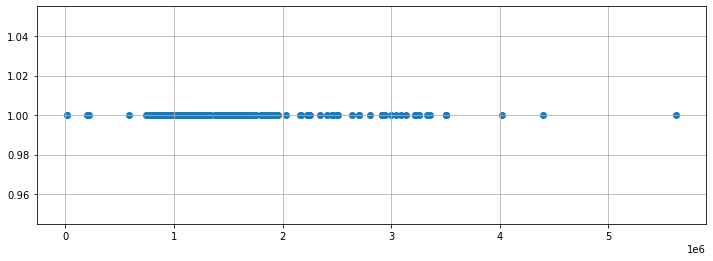

In [100]:
tmp_y = [1]*len(GPU_info70_nosecond["가격"])

plt.figure(figsize=(12,4))
plt.scatter(GPU_info70_nosecond["가격"], tmp_y)
plt.grid()
plt.show()
# 1 = 1000000 으로 보입니다.

In [101]:
import numpy as np

In [102]:
np.median(GPU_info70_nosecond["가격"])

940730.5

In [104]:
np.percentile(GPU_info70_nosecond["가격"], 25)

878222.5

In [105]:
np.percentile(GPU_info70_nosecond["가격"], 75)

1052700.0

In [106]:
iqr = np.percentile(GPU_info70_nosecond["가격"], 75) - np.percentile(GPU_info70_nosecond["가격"], 25) 
iqr

174477.5

In [107]:
q1 = np.percentile(GPU_info70_nosecond["가격"], 25)
q2 = np.median(GPU_info70_nosecond["가격"])
q3 = np.percentile(GPU_info70_nosecond["가격"], 75)
upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5

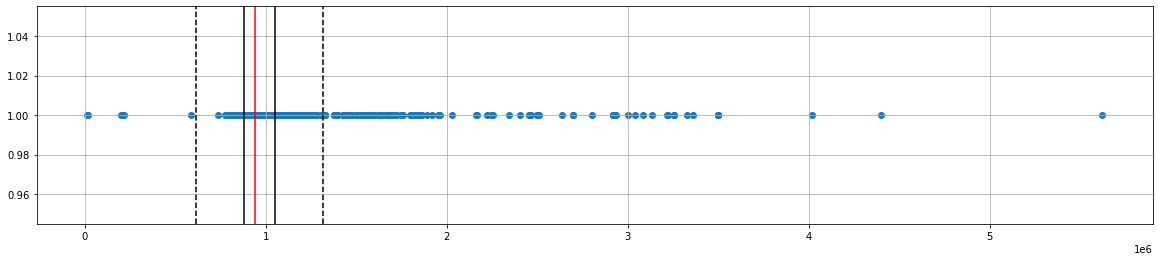

In [114]:
plt.figure(figsize=(20, 4))
plt.scatter(GPU_info70_nosecond["가격"], tmp_y)
plt.axvline(x=q1, color = 'black')
plt.axvline(x=q2, color = 'red')
plt.axvline(x=q3, color = 'black')
plt.axvline(x=upper_fence, color = 'black', ls='dashed')
plt.axvline(x=lower_fence, color = 'black', ls='dashed')
plt.grid()
plt.show()

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


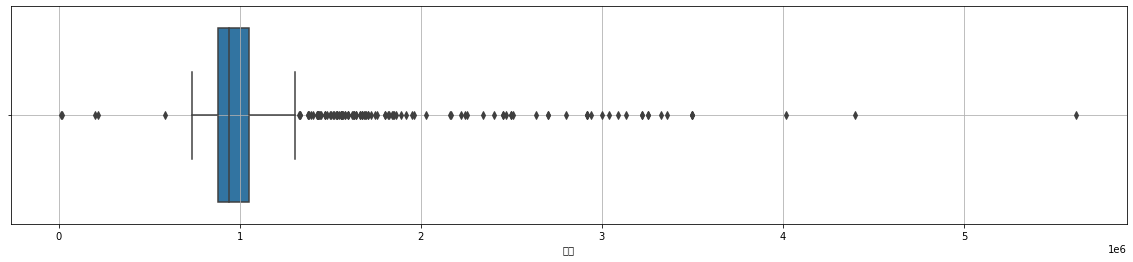

In [115]:
import seaborn as sns
plt.figure(figsize=(20,4))
sns.boxplot(GPU_info70_nosecond["가격"])
plt.grid()
plt.show()

In [117]:
upper_fence = q3 + iqr*1.5
upper_fence

1314416.25

In [120]:
lower_fence = q3 - iqr*1.5
lower_fence

790983.75